In [1]:
from pylab import *

## SIS Model: Euler's Method

Set up

N= 100; gamma= 0.25; Beta as {0.03, 0.06, 0.10}; h as {0.01, 0.5, 2.0}

one plot for each combo (for both Euler and Heun)

In [2]:
def initialize():
    global S, I, N, resultS, resultI, t, timesteps
    #initial state: 90 susceptible, 10 infected
    S= 90
    I= 10
    N= S + I
    resultS = [S]
    resultI= [I]
    #initial time
    t= 0.
    timesteps= [t]

In [3]:
def observe():
    global S, I, N, resultS, resultI, t, timesteps
    
    resultS.append(S)
    resultI.append(I)
    timesteps.append(t)

In [4]:
def update_e(h, B, gam):
    global S, I, N, resultS, resultI, t, timesteps
    
    #I0= I + ((B*S*I - gam*I) *h)
    #S0= S + ((-B*S*I + gam*I) *h)
    
    #I= I0
    #I= I + ((B*S*I - gam*I) *h)
    #S= S0
    #S = N-I
    
    #S= S * (1-B*h)**I + gam*I
    
    #SD= -B*S*I + gam* I
    
    #S= S + SD*h
    
    #DS= (S * (1-B*h)**I) + gam*I
    #S= S + DS*h
    
    DS = -S * B*I + gam*I #new infections, change in S
    S = S + DS*h
    I = I - DS*h
    
    #delta_S = -S * B*I + gam*I #rate of new infections
    #S += delta_S*h #S(t+1)
    #I+= -delta_S*h #I(t+1)
    
    #I = N-S
    
    t= t + h

## SIS Model: Heun's Method

Once again, initialize and observe can stay exactly the same, just need new function for update to include Heun's method

In [34]:
def update_h(h, B, gam):
    global S, I, N, resultS, resultI, t, timesteps
    
    #Ie= I + ((B*S*I - gam*I) *h)
    #Se= S + ((-B*S*I + gam*I) *h)

    #I0= I + (((B*S*I - gam*I) + (B*S*Ie - gam*Ie))/2)*h
    #S0= S +  (((-B*S*I + gam*I)+(-B*Se*e + gam*I))/2)*h
    
    #I= I0
    #I= I + (((B*S*I - gam*I) + (B*S*Ie - gam*Ie))/2)*h
    #S= S0
    #S= N-I
    
    #Se= S * (1-B*h)**I + gam*I
    
    #S= ((S * (1-B*h)**I + gam*I)+(Se * (1-B*h)**I + gam*I))/2
    
    #I= N-S
    
    DS = -S * B*I + gam*I #new infections, change in S
    Se = S + DS*h
    #Ie = I - DS*h
    
    DSe = -Se * B*I + gam*I
    
    S = S+ ((DS+DSe)/2)*h
    I = I- ((DS+DSe)/2)*h
    
    #S = S+ ((S+DS)+(Se+DSe)/2)*h
    #I = I- ((S+DS)+(Se+DSe)/2)*h
    
    t= t +  h

## Iterate through all given parameters

In [35]:
gamma= 0.25
Betas= [0.03, 0.06, 0.10]
h_sizes= [0.01, 0.5, 2.0]

In [36]:
#this is a bit of a cheat maybe since I can't figure out a better way for getting labels
all_Betas= [0.03, 0.03, 0.03, 0.06, 0.06, 0.06, 0.1, 0.1, 0.1]
all_hs= [0.01, 0.5, 2.0, 0.01, 0.5, 2.0, 0.01, 0.5, 2.0]

In [37]:
all_timesteps_e=[]
all_susceptible_e=[]
all_infected_e=[]

all_timesteps_h=[]
all_susceptible_h=[]
all_infected_h=[]

In [38]:
#EULER METHOD
for B in Betas:
    for h in h_sizes:
        initialize()
        while t<50:
            update_e(h, B, gamma)
            observe()
        all_timesteps_e.append(timesteps)
        all_susceptible_e.append(resultS)
        all_infected_e.append(resultI)

In [39]:
#HEUN METHOD
for B in Betas:
    for h in h_sizes:
        initialize()
        while t<50:
            update_h(h, B, gamma)
            observe()
        all_timesteps_h.append(timesteps)
        all_susceptible_h.append(resultS)
        all_infected_h.append(resultI)
        

## Plot everything in nice plots

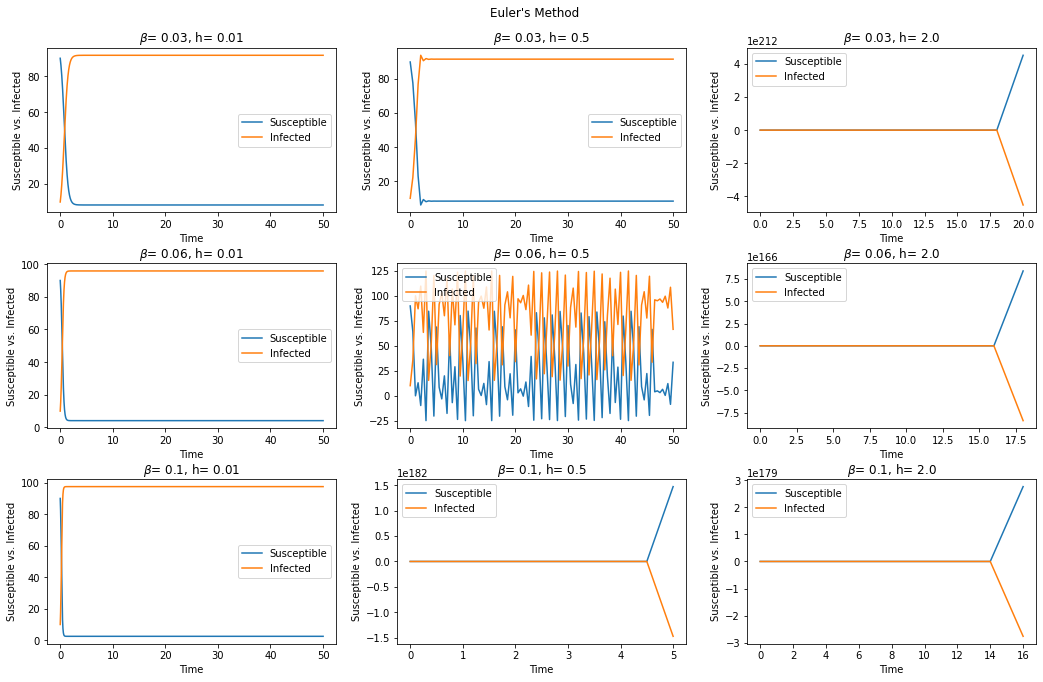

In [40]:
subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
suptitle('Euler\'s Method', x=0.5, y=0.95)
tight_layout(pad=3)

for i in range(len(all_timesteps_e)):
    subplot(3,3,i+1)
    plot(all_timesteps_e[i], all_susceptible_e[i], label='Susceptible')
    plot(all_timesteps_e[i], all_infected_e[i], label='Infected')
    xlabel('Time')
    ylabel('Susceptible vs. Infected')
    title('$\\beta$= {}, h= {}'.format(all_Betas[i], all_hs[i]))
    legend()
    
savefig('Q4 Euler.png')

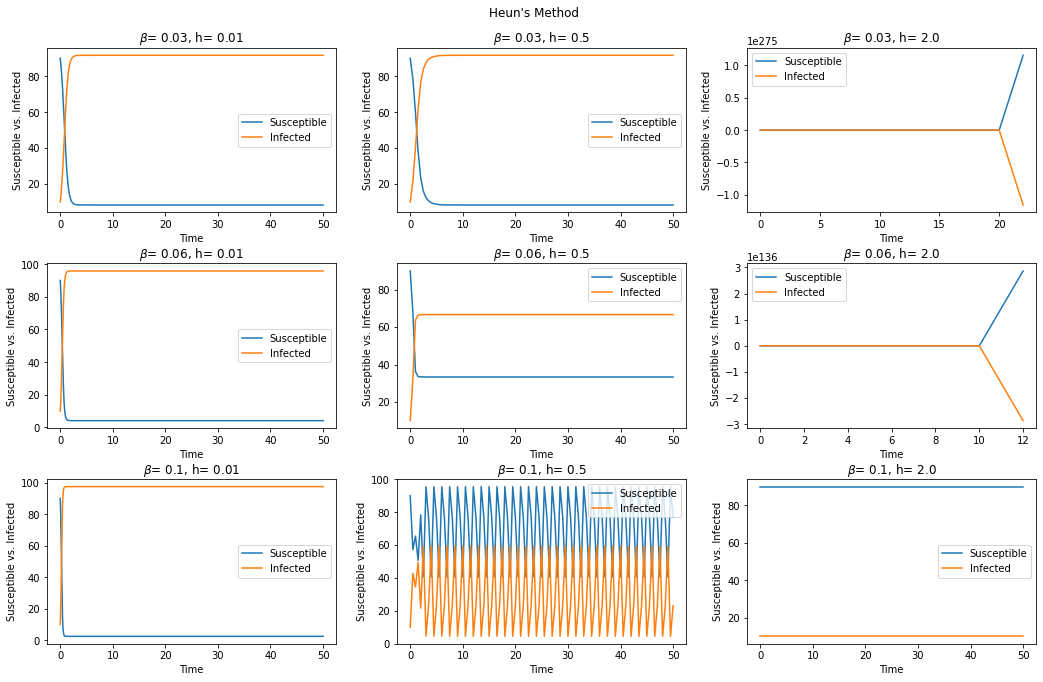

In [41]:
subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
suptitle('Heun\'s Method', x=0.5, y=0.95)
tight_layout(pad=3)

for i in range(len(all_timesteps_h)):
    subplot(3,3,i+1)
    plot(all_timesteps_h[i], all_susceptible_h[i], label='Susceptible')
    plot(all_timesteps_h[i], all_infected_h[i], label='Infected')
    xlabel('Time')
    ylabel('Susceptible vs. Infected')
    title('$\\beta$= {}, h= {}'.format(all_Betas[i], all_hs[i]))
    legend()
    
savefig('Q4 Heun.png')

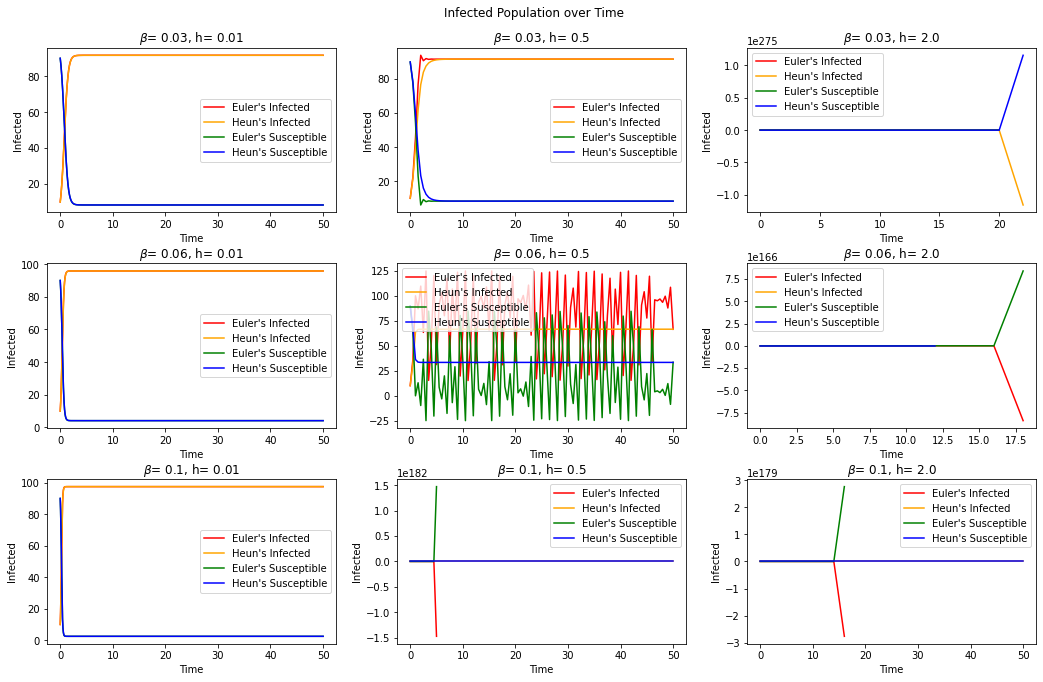

In [44]:
subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
suptitle('Infected Population over Time', x=0.5, y=0.95)
tight_layout(pad=3)

for i in range(len(all_timesteps_e)):
    subplot(3,3,i+1)
    plot(all_timesteps_e[i], all_infected_e[i], label='Euler\'s Infected', color='red')
    plot(all_timesteps_h[i], all_infected_h[i], label='Heun\'s Infected', color='orange')
    plot(all_timesteps_e[i], all_susceptible_e[i], label='Euler\'s Susceptible', color='green')
    plot(all_timesteps_h[i], all_susceptible_h[i], label='Heun\'s Susceptible', color='blue')
    xlabel('Time')
    ylabel('Infected')
    title('$\\beta$= {}, h= {}'.format(all_Betas[i], all_hs[i]))
    legend()
    
savefig('Q4 Both Methods.png')

both step size h and beta affect how well eulers and heuns work, it works best (in this case) with low h and low beta; heun's performs slightly better, working better for b=0.06 and h=0.5 but not for any scenario with a higher beta or higher h